# Home Assignment No. 1

To solve this task, you will write a lot of code to try several machine learning methods for classification and regression.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, whole life?).

* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of your own code. There exists a class/method for almost everything you can imagine (related to this homework).

* You have to write **CODE** directly inside specified places marked by comments: **BEGIN/END Solution**. Do not create new cells.

* In some problems you are asked to provide a short discussion of the results. For that find the specific place marked via **Your text answer: \<write your answer\>**.

* For every separate problem or subproblem (if specified) you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task.

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e., if the reviewer decides to restart the notebook and run all cells, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest fixing random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include necessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

* Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameters and set it to `-1` to use all the cores.

To begin with, let's import the essential (for this assignment) libraries.

In [1]:
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.datasets import make_moons, make_circles

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
# Your imports
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, Ridge

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, QuantileTransformer, FunctionTransformer, MinMaxScaler
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score, precision_score, roc_curve, roc_auc_score, average_precision_score, mean_squared_log_error
from sklearn.metrics import mean_squared_error as mse

from sklearn.model_selection import GridSearchCV, PredefinedSplit, cross_val_score
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.metrics import f1_score

from sklearn.metrics import make_scorer
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

import time
import itertools
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

## Task 1. Numpy Problem 1 (1 point)

Write a function, which takes a matrix `arr` and shift by mean and scale by standard deviation each column. Check [this](https://docs.scipy.org/doc/numpy/reference/routines.statistics.html)
out for documentation.

In [3]:
def normalize(arr):
    """Shift by mean and scale by standard deviation each column of a matrix.

    Parameters
    ----------
    arr : array, shape = (n_rows, n_cols)
        The matrix, the columns of which to normalize.

    Returns
    ----------
    out : array, shape = (n_rows, n_cols)
        The final column-centered matrix.
    """
    assert arr.ndim == 2
    n_rows, n_cols = arr.shape

    ### BEGIN Solution (do not delete this comment)
    out = (arr - np.mean(arr, axis=0)) / np.std(arr, axis=0) 
    ### END Solution (do not delete this comment)

    return out

## Task 2. Numpy Problem 2 (1 point)

Plot the **Hypotrochoid** given by the following equation:
$$\begin{cases}
x(t)=(R - r) \cdot \cos(t) + d \cdot \cos\bigg(\frac{R - r}{r}\cdot t\bigg)\\
y(t)=(R - r) \cdot \sin(t) - d \cdot \sin\bigg(\frac{R - r}{r}\cdot t\bigg)
\end{cases}, 0\leq t\leq 2\pi\cdot \frac{LCM(r, R)}{R};$$
(LCM - Least Common Multiple)
with all possible values of $(R,r,d)$ if $R\in\{5,9\}$, $r\in\{2,3\}$, $d\in\{3,4\}$.

Make sure that each plot has different color.

To compute LCM you can use `math.gcd` and relationship between LCM and GCD

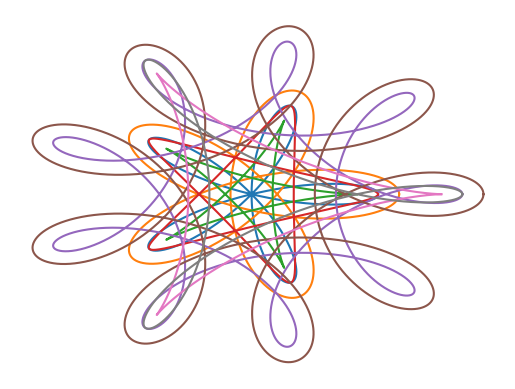

In [4]:
### BEGIN Solution (do not delete this comment)

import math

for R in [5, 9]:
    for r in [2, 3]:
        for d in [3, 4]:
            up_bound = 2 * math.pi * r / math.gcd(r, R) # calculate 2*pi*LCM / R, LCM = R*r/GCD
            t = np.linspace(0, up_bound, 10000)
            scaled_t = (R - r) / r * t # calculate (R-r) / r * t
            x = (R - r) * np.cos(t) + d * np.cos(scaled_t)
            y = (R - r) * np.sin(t) - d * np.sin(scaled_t)
            plt.plot(x, y)
            plt.axis('off')

plt.show()

### END Solution (do not delete this comment)

## Task 3. Matplotlib (1 points)

Plot the level sets of the $l^p$ norm (actually, this is not a norm for $p<1$)
\begin{equation}
    \|z\|_p = \biggl(\sum_i \lvert x_i\rvert^p\biggr)^\tfrac1{p}
        \,,
\end{equation}
and make the contour of the unit ball in $l^p$ norm stand out. Draw plots
for $p \in \{0, \tfrac1{20}, \tfrac14, \tfrac12, 1, 1.5, 2, 5, 10, \infty\}$.

Study plotting examples on [this](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contourf.html#matplotlib.pyplot.contourf) and [this](http://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html) pages (**especially the last one**) and have a look at these functions: *np.meshgrid*, *np.linspace* in numpy's documentation. We suggest to use `np.linalg.norm`.

Try to produce a plot that **looks like the one below**:

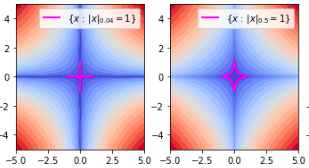

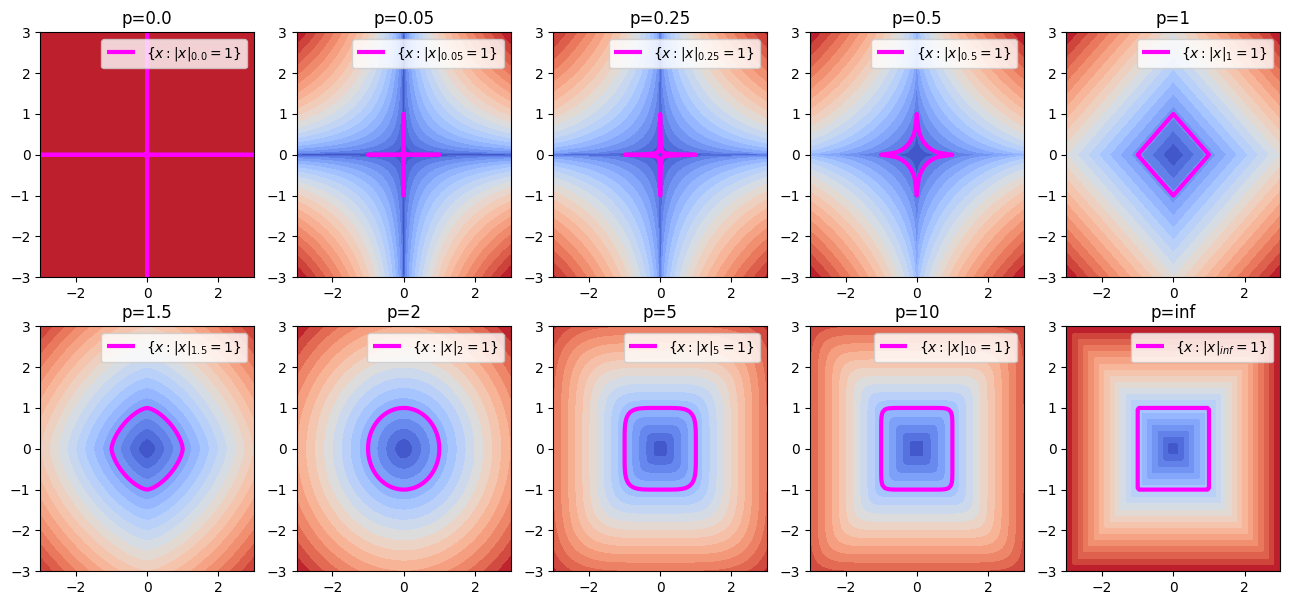

In [18]:
p_values = [0., 0.05, 0.25, 0.5, 1, 1.5, 2, 5, 10, np.inf]
xx, yy = np.meshgrid(np.linspace(-3, 3, num=101),
                     np.linspace(-3, 3, num=101))

fig, axes = plt.subplots(ncols=(len(p_values) + 1)// 2,
                         nrows=2, figsize=(16, 7))

for p, ax in zip(p_values, axes.flat):
    ### BEGIN Solution (do not delete this comment)
    if p == 0:
        zz = (xx != 0).astype(int) + (yy != 0).astype(int)
    else:
        if np.isinf(p):
            zz = np.maximum(np.abs(xx),np.abs(yy))
        else:
            zz = ((np.abs((xx))**p) + (np.abs((yy))**p))**(1./p)
    ax.contourf(xx, yy, zz, 20, cmap='coolwarm')
    tmp = ax.contour(xx,yy,zz, [1], colors='#FF00FF', linewidths = 3)
    ax.legend(tmp.legend_elements()[0], ["{$x:|x|_{" + str(p) + "}=1$}"],loc="upper right")
    ax.set_title(f'p={p}')
    ### END Solution (do not delete this comment)
plt.show()

## Task 4. Decision Rules and Feature Engineering (1+1 points)

In this task, your goal is to visualize the decision rules of several classifiers applied to an artificial $2$-dimensional dataset inspired by the dataset that can be created using the built-in `sklearn.datasets` method called `make_moons`. The main difference is a sun added outside the moons. In the cell below we generate the dataset.

In [6]:
def make_sunny_moons(n_sun=50, n_moons=100, noise=0.0, sun_radius=1.9, theta=None):
    X_moons, y_moons = make_moons(n_samples=n_moons, noise=noise, random_state=0xC0FFEE)
    if not n_sun:
        return X_moons, y_moons
    
    np.random.seed(0xC0FFEE)
    angles = np.arange(0, 2 * np.pi, 2 * np.pi / n_sun)
    X_sun = sun_radius * np.column_stack([np.cos(angles), np.sin(angles)]) + np.array([0.5, 0.25])
    X_sun += np.random.normal(scale=noise, size=X_sun.shape)
    y_sun = 2 * np.ones(n_sun)

    X = np.vstack([X_moons, X_sun])
    y = np.concatenate([y_moons, y_sun]).astype(int)
    X -= X.mean(axis=0)

    if theta is None:
        theta = np.pi / 4
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c,-s), (s, c)))
    X = X @ R
    
    return X, y

X, y = make_sunny_moons(n_sun=150, n_moons=300, noise=0.15)

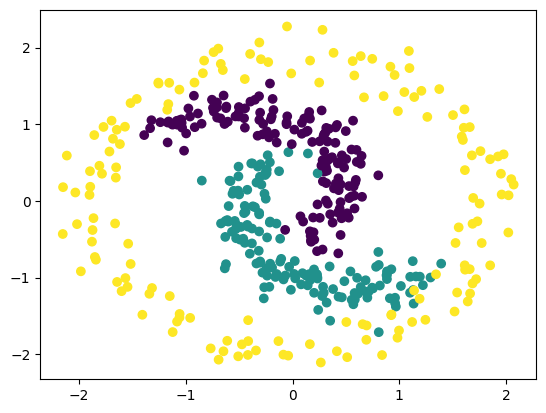

In [7]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

### Subproblem 4.1. Decision Rule Plotting (1 point)

The goal of the subproblem is to fit the following classifiers on features `X` to target `y`:
* Decision Tree (single!) with small depth ($\leq 4$);
* Random Forest with a small number of trees ($\leq 20$) of small depth ($\leq 4$);
* Logistic Regression;
* Support Vector Machine with RBF kernel;
* Gaussian Naive Bayes;
* k-Nearest Neighbor Classifier with a small number of neighbors (e.g. $5$);

For all the fitted classifiers you have to plot the decision regions (the example is shown below the cell). Each plot must have **Title** which contains the name of the classifier and its accuracy (only **two** decimal places) on the data.

You can write the plotting code on your own, but we highly recommend just to use `mlxtend` library (`pip install mlxtend` in linux terminal), which has an awesome one-line decision rule plotting function (you are to [google](http://google.com) it).

![image](data/ex.png)

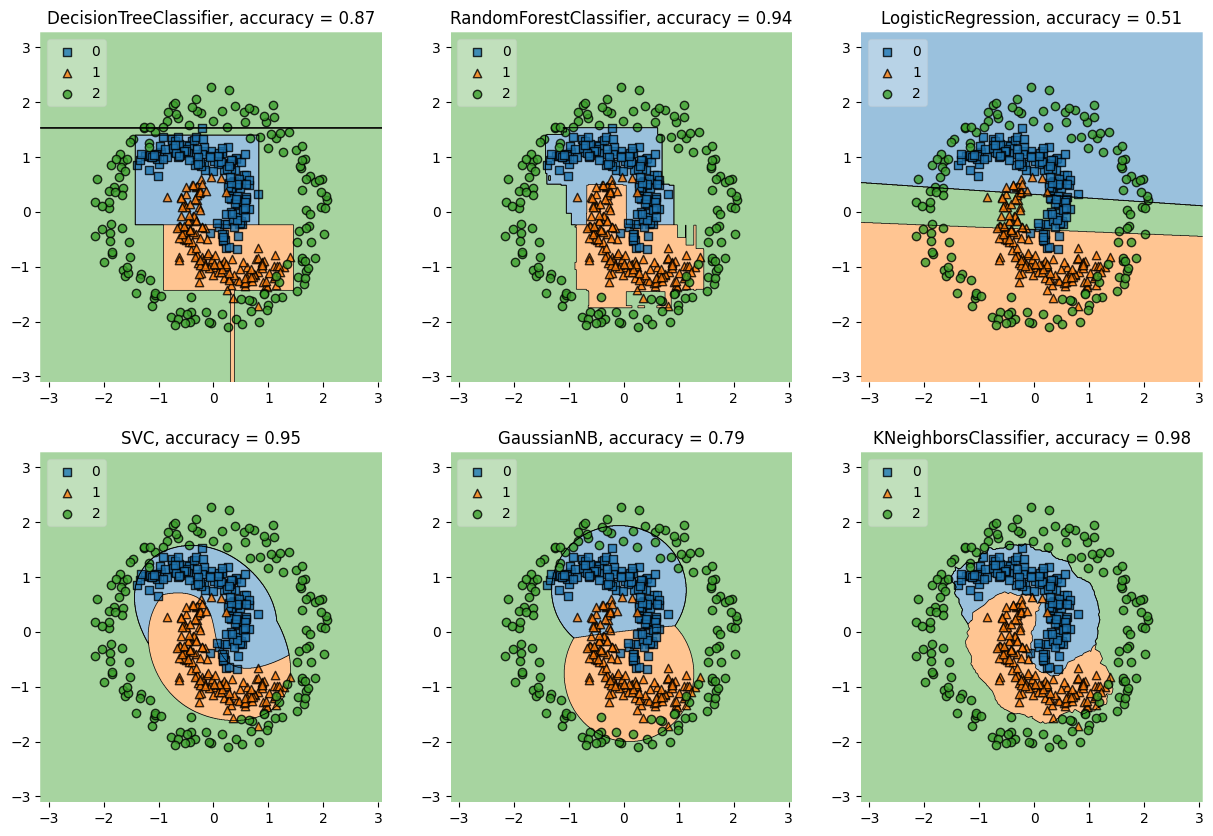

In [8]:
### BEGIN Solution (do not delete this comment)
dtree = DecisionTreeClassifier(random_state=0xC0FFEE, max_depth=4)
rf = RandomForestClassifier(n_estimators=20, max_depth=4, random_state=0xC0FFEE, n_jobs=-1)
logreg = LogisticRegression(random_state=0xC0FFEE, n_jobs=-1)
svm = SVC(kernel='rbf', random_state=0xC0FFEE)
gnb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

models = [dtree, rf, logreg, svm, gnb, knn]
labels = ['DecisionTreeClassifier', 'RandomForestClassifier', 'LogisticRegression', 
          'SVC', 'GaussianNB', 'KNeighborsClassifier']

gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(15, 10))

for clf, lbl, grd in zip(models, labels, itertools.product([0, 1], [0, 1, 2])):
    
    clf.fit(X, y)
    pred = clf.predict(X)
    accuracy = accuracy_score(y, pred)

    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lbl + ', accuracy = {:.2f}'.format(accuracy))

plt.show()
### END Solution (do not delete this comment)

### Subproblem 4.2. Pipeline: Fitting to Data by Feature Engineering (1 point)
In previous task 4.1 several classifiers obviously failed fitting to data. This happened because the decision rule of the classifier has a restricted form (e.g. linear for linear models), while the data is more complicated.

One may try to change the parameters of the classifier (e.g. increase the number of trees in Forest) in order to improve accuracy, but some models (especially linear) do not have parameters that can change the form of the decision rule.

In this case the **feature engineering** helps: one may try to compute new (e.g. non-linear) features based on the existing pool and fit the classifier in the new features. This may help low-complex classifiers to fit to hard data dependencies.

Your task it to
* Choose **two classifiers** from the previous problem among Decision Tree, Random Forest, Naive Bayes, Logistic Regression;
* By generating of additional features (e.g. polynomial) make them achieve accuracy $>0.95$.
* For each classifier, write 2-3 sentences about why did you choose these features.
* Plot their decision rules in the original feature space.

It is your choice how to generate features. You may create hand-crafted features and add them manually. Nevertheless, we **highly suggest** to get used to and apply the following builtin `sklearn` methods:
* `PolynomialFeatures`, `GaussianRandomProjection` among others - for feature generation
* `StandartScaler`, `MinMaxScaler` among others - for feature scaling
* `Pipeline` - for combining several operations in a row (e.g. feature creation & prediction)

In [9]:
rf = RandomForestClassifier(n_estimators=20, max_depth=4, random_state=0xC0FFEE, n_jobs=-1)
logreg = LogisticRegression(random_state=0xC0FFEE, n_jobs=-1)

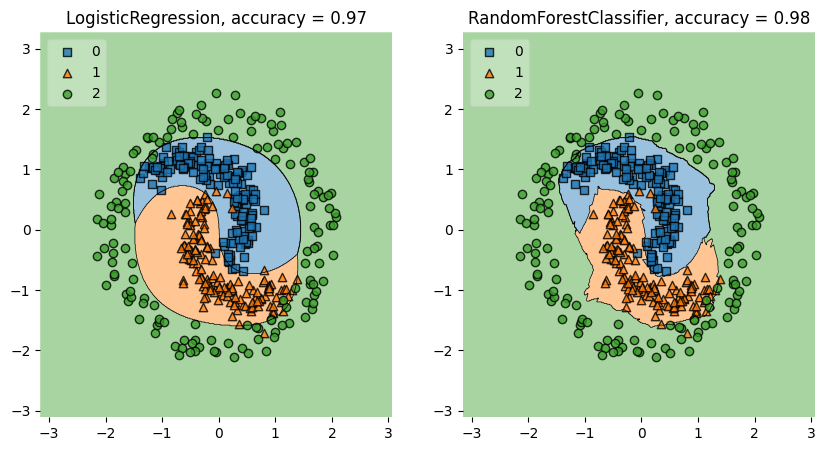

In [10]:
### BEGIN Solution (do not delete this comment)
pipe1 = Pipeline([('poly', PolynomialFeatures(4)), ('logreg', logreg)]) #only polynomial for logistic regression
pipe1.fit(X, y)
score1 = pipe1.score(X, y)

pipe2 = Pipeline([('poly', PolynomialFeatures(3)),
                  ('proj', GaussianRandomProjection(n_components=100, random_state=0xC0FFEE)),
                  ('rf', rf)]) # standart scaler + polynomial + projection
pipe2.fit(X, y)
score2 = pipe2.score(X, y)

gs = gridspec.GridSpec(1, 2)
fig = plt.figure(figsize=(10, 5))

ax = plt.subplot(gs[0, 0])
fig = plot_decision_regions(X=X, y=y, clf=pipe1, legend=2)
plt.title('LogisticRegression' + ', accuracy = {:.2f}'.format(score1))

ax = plt.subplot(gs[0, 1])
fig = plot_decision_regions(X=X, y=y, clf=pipe2, legend=2)
plt.title('RandomForestClassifier' + ', accuracy = {:.2f}'.format(score2))

plt.show()
### END Solution (do not delete this comment)

**Your text answer (do not delete this comment)**:

1) As we can see, data is not linear separable, so it is problem for LogisticRegression. Thus we can use polynomial features to separate points not by line, but by curve, so this is why I used PolynomialFeatures. Polynomial features helped to catch non-linear dependencies for LogisticRegression.

2) For RandomForestClassifier I generated Polynomial features to help this method get more information about data. But also it needed an projection, because it has low depth trees and it difficult to learn from big amount of features, so we can leave only informative features to better Random Forest performance.

## Task 5. Bagging Ensembles of Regressors (1+1 points)
In this problem, you are to deal with [Concrete Compressive Strength Dataset](https://www.kaggle.com/elikplim/concrete-compressive-strength-data-set). Your goal will be to determine the optimal parameters for two Bagging-Based Forest Ensemble **Regressors** and compare the forests. Let's load the data and split it into test and train parts.

In [10]:
data = pd.read_csv('data/concrete.csv').astype(float)
X = data.drop('concrete_compressive_strength', axis=1)
y = data.concrete_compressive_strength
n = len(X)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=int(n*0.15), random_state=0xC0FFEE)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=int(n*0.15), random_state=0xC0FFEE)

data.sample(3).sort_index()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
299,290.4,0.0,96.2,168.1,9.4,961.2,865.0,3.0,22.50
491,387.0,20.0,94.0,157.0,14.3,938.0,845.0,7.0,36.84
831,154.0,144.0,112.0,220.0,10.0,923.0,658.0,28.0,16.50


Please note that both in Task 4 the whole data was the Train Data. In Task 4 the output score (accuracy) was the **train** score (i.e. the score on the train data of the model fitted on the same data).

In this problem, we do a step further and split the whole data into the **train part** (on which we train), **validation part** (on which we tune hyperparameters) and **test part** (where we compute the final test score on the validated model).

In this problem, you are to consider the `RandomForestRegressor` and `ExtraTreesRegressor` models for the prediction of concrete compressive strength under **squared loss function** (mean squared error). Recall that Random Forest was discussed in the lectures. [Extremely Randomized Forest](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.65.7485&rep=rep1&type=pdf) is another bootstrapped forest with a simple tree building algorithm. Basically, each split of each tree node is chosen at random both w.r.t. feature and threshold (while in the random forest the split minimizes impurity).

### Subproblem 5.1. Hyperparameters tuning (1 point)

* For both Forests perform the Grid Search (on the validation data) over most important algorithm's parameters (what are they?) to determine the optimal hyperparameters.
* For the optimal hyperparameters output the train score, the validation score and the test score (use the model with best hyperparameters refitted on the train set).

In [37]:
### BEGIN Solution (do not delete this comment)
parameters = {'n_estimators':[30, 50, 80, 100, 150, 200], 'max_depth':[10, 15, 20, 40, None], 
              'max_features':[0.3,0.5,0.7,0.85,1.0], 'min_samples_leaf':[1,3,5,7]}

X_cv = np.vstack((X_train, X_val)) # stack X_train and X_val for GridSearchCV function
test_fold = [-1 for _ in range(X_train.shape[0])] + [0 for _ in range(X_val.shape[0])]
y_cv = np.concatenate([y_train, y_val])
ps = PredefinedSplit(test_fold)

grid_rf = GridSearchCV(RandomForestRegressor(random_state=0xC0FFEE, n_jobs=-1), parameters, cv = ps, n_jobs = -1, 
                    scoring=make_scorer(mse, greater_is_better=False), verbose = 0, refit = False)
grid_rf.fit(X_cv, y_cv)

grid_extra = GridSearchCV(ExtraTreesRegressor(random_state=0xC0FFEE, n_jobs=-1), parameters, cv = ps, n_jobs = -1, 
                    scoring=make_scorer(mse, greater_is_better=False), verbose = 0, refit = False)
grid_extra.fit(X_cv, y_cv)

rf = RandomForestRegressor(**grid_rf.best_params_, random_state=0xC0FFEE, n_jobs=-1)
extra = ExtraTreesRegressor(**grid_extra.best_params_, random_state=0xC0FFEE, n_jobs=-1)

rf.fit(X_train, y_train)
extra.fit(X_train, y_train)

print('Ensemble Classifier     Train   Valid   Test')
print('ExtraTreesRegressor     {:.2f}    {:.2f}   {:.2f}'.format(mse(y_train, extra.predict(X_train)), 
      mse(y_val, extra.predict(X_val)), mse(y_test, extra.predict(X_test))))
print('RandomForestRegressor   {:.2f}    {:.2f}   {:.2f}'.format(mse(y_train, rf.predict(X_train)), 
      mse(y_val, rf.predict(X_val)), mse(y_test, rf.predict(X_test))))
### END Solution (do not delete this comment)

Ensemble Classifier     Train   Valid   Test
ExtraTreesRegressor     1.33    16.12   21.84
RandomForestRegressor   4.99    19.12   23.88


### Subproblem 5.2. Results explanation (1 point) 

* Compare the obtained scores. Explain, why the scores differ a lot for train and validation/test.
* Which of the algorithms perform better on the training set? Explain why!

**Your text answer (do not delete this comment)**:

* The scores differ a lot because trees prone to overfitting. They fit train data pretty good, but if test data differs from train one, then RandomForest and ExtraTrees will perform low accuracy.
* ExtraTrees performed better on the training set. It can be explained by nature of splitting in Random Forest - it is uses greedy algorithm for splitting, but greedy approach not always leads to best result. At the same time ExtraRandomizedTrees use random features and threshold, so it showed us better result, which means that for this task with mse error RandomForest not best model, and random feature and threshold choice can be better solution.

## Task 6. Boosting (1+1 points)


> Boosting Machines (BM) is a family of widely popular and effective methods for classification and regression tasks. The main idea behind BMs is that **combining weak learners**, which perform slightly better than random, can result in **strong learning models**.

> AdaBoost utilizes the greedy training approach: firstly, we train the weak learners (they are later called `base_classifiers`) on the whole dataset and in the next iterations we train the model on the samples, on the which the previous models have performed poorly. This behavior is achieved by reweighting the training samples during each algorithm's step.

#### The task:

In this exercise you will be asked to implement one of the earlier variants of BMs - **AdaBoost** and compare it to the already existing `sklearn` implementation. The key steps are:

* Complete the `ada_boost_alpha` and `ada_boost_distribution` functions

* Complete the `.fit` method of `Boosting` class

* Complete the `.predict` method of `Boosting` class

The pseudocode for AdaBoost can be found in lectures.

For `ada_boost_distribution` please use another pseudocode, that used for `sklearn` realization:
$$
\begin{align}
&\textbf{for } i \gets 1 \textbf{ to } m \textbf{ do}\\
&\;\;\;\;w_{i,t+1}\gets w_{i,t}\exp(-\alpha_t y_t h_t(\mathbf{x}_i))\\
&C = \sum_{j=1}^m w_{j,t+1}\\
&\textbf{for } i \gets 1 \textbf{ to } m \textbf{ do}\\
&\;\;\;\;\tilde{w}_{i,t+1}\gets \tfrac{1}{C}w_{i,t+1}
\end{align}
$$

##### criteria

the decision boundary of the final implementation should look reasonably identical to the model from `sklearn`, and should achieve accuracy close to `scikit` :

$$
    |\text{your\_accuracy} - \text{sklearn\_accuracy}| \leq 0.005
\,. $$

In [13]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [14]:
### Plot the dataset

X, y = make_moons(n_samples=1000, noise=0.3, random_state=0xC0FFEE)

# for convenience convert labels from {0, 1} to {-1, 1}
y[y == 0] = -1

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0xC0FFEE)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 30),
                     np.linspace(y_min, y_max, 30))

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

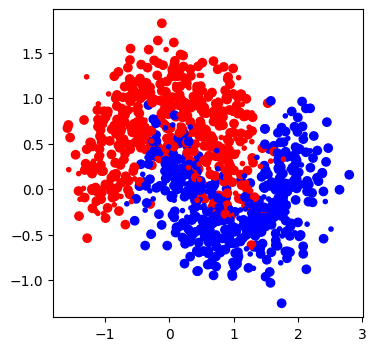

In [16]:
# Plot the training points
plt.figure(figsize=(4, 4))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
plt.scatter(X_test[:, 0], X_test[:, 1], marker='.', c=y_test, cmap=cm_bright)
plt.show()

In [17]:
from sklearn.tree import DecisionTreeClassifier # base classifier

### Subproblem 6.1. AdaBoost alphas and distributions (1 point)

Now let us define functions to calculate alphas and distributions for AdaBoost algorithm

In [18]:
def ada_boost_alpha(y, y_pred_t, distribution):
    """
    Function, which calculates the weights of the linear combination of the classifiers.
    
    y_pred_t is a prediction of the t-th base classifier
    """
    ### BEGIN Solution (do not delete this comment)
    err = ((y != y_pred_t) * distribution).sum()
    alpha = 0.5 * np.log((1-err) / err)
    ### END Solution (do not delete this comment)

    return alpha

def ada_boost_distribution(y, y_pred_t, distribution, alpha_t):
    """
    Function, which calculates sample weights
    
    y_pred_t is a prediction of the t-th base classifier
    """
    ### BEGIN Solution (do not delete this comment)
    distribution = distribution * np.exp(-alpha_t * y_pred_t * y)
    distribution /= distribution.sum()
    ### END Solution (do not delete this comment)

    return distribution

### Subproblem 6.2. Boosting implementation (1 point)

Implement your own AdaBoost algorithm. Then compare it with the `sklearn` implementation.

In [19]:
class Boosting():
    """
    Generic class for construction of boosting models
    
    :param n_estimators: int, number of estimators (number of boosting rounds)
    :param base_classifier: callable, a function that creates a weak estimator. Weak estimator should support sample_weight argument
    :param get_alpha: callable, a function, that calculates new alpha given current distribution, prediction of the t-th base estimator,
                      boosting prediction at step (t-1) and actual labels
    :param get_distribution: callable, a function, that calculates samples weights given current distribution, prediction, alphas and actual labels
    """
    def __init__(self, n_estimators=50, base_classifier=None,
                 get_alpha=ada_boost_alpha, update_distribution=ada_boost_distribution):
        self.n_estimators = n_estimators
        self.base_classifier = base_classifier
        self.get_alpha = get_alpha
        self.update_distribution = update_distribution
        
    def fit(self, X, y):
        n_samples = len(X)
        distribution = np.ones(n_samples, dtype=float) / n_samples
        self.classifiers = []
        self.alphas = []
        for i in range(self.n_estimators):
            # create a new classifier
            self.classifiers.append(self.base_classifier())     
            self.classifiers[-1].fit(X, y, sample_weight=distribution)

            ### BEGIN Solution (do not delete this comment)
            
            # make a prediction
            y_pred = self.classifiers[-1].predict(X)
            
            #update alphas, append new alpha to self.alphas
            alpha = ada_boost_alpha(y, y_pred, distribution)
            self.alphas.append(alpha)
            
            # update distribution and normalize
            distribution = ada_boost_distribution(y, y_pred, distribution, alpha)
            #print(alpha, distribution)
            
            ### END Solution (do not delete this comment)

    
    def predict(self, X):
        final_predictions = np.zeros(X.shape[0])
    
        ### BEGIN Solution (do not delete this comment)
        
        #get the weighted votes of the classifiers
        for i, classifier in enumerate(self.classifiers):
            final_predictions += self.alphas[i] * classifier.predict(X)
            
        out = np.sign(final_predictions)
        ### END Solution (do not delete this comment)

        return out

In [20]:
from sklearn.ensemble import AdaBoostClassifier

max_depth = 5
n_estimators = 100

get_base_clf = lambda: DecisionTreeClassifier(max_depth=max_depth)
ada_boost = Boosting(n_estimators=n_estimators,
                     base_classifier=get_base_clf)
ada_boost.fit(X_train, y_train)

ada_boost_sklearn = AdaBoostClassifier(DecisionTreeClassifier(max_depth=max_depth),
                                       algorithm="SAMME",
                                       n_estimators=n_estimators)

ada_boost_sklearn.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=5),
                   n_estimators=100)

In [21]:
classifiers = [ada_boost, ada_boost_sklearn]
names = ['ada_boost', 'ada_boost_sklearn']

accuracy ada_boost: 0.895
accuracy ada_boost_sklearn: 0.89


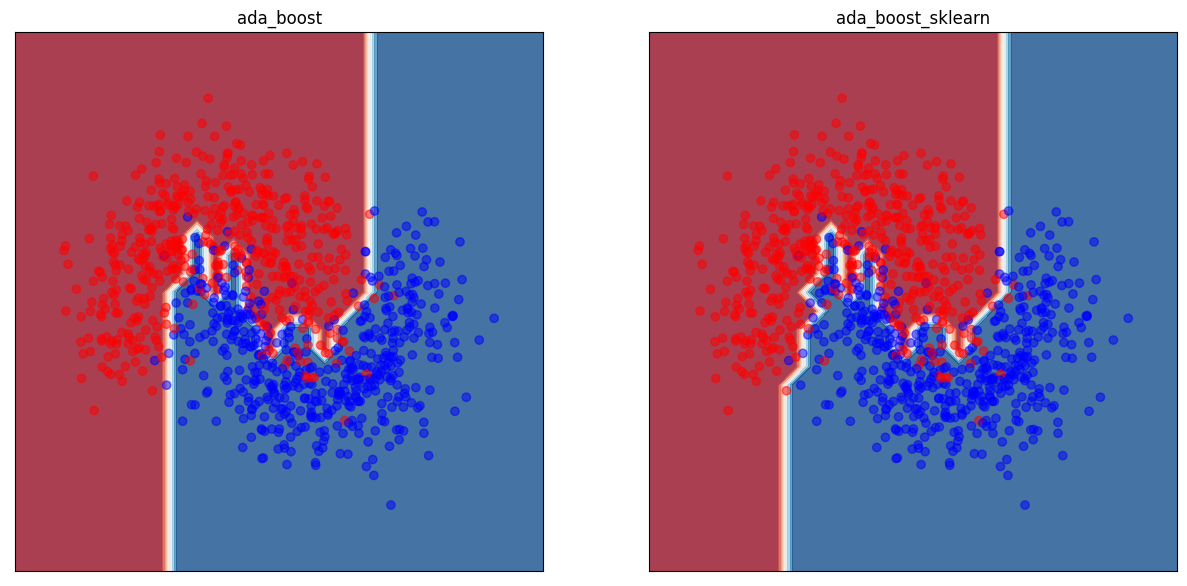

In [22]:
# # test ensemble classifier
plt.figure(figsize=(15, 7))
for i, clf in enumerate(classifiers):
    prediction = clf.predict(X_test)

    # Put the result into a color plot
    ax = plt.subplot(1, len(classifiers), i + 1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot also the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, alpha=0.5)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(names[i])

    print('accuracy {}: {}'.format(names[i], (prediction == y_test).sum() * 1. / len(y_test)))

## Task 7. Gradient Boosting (1 point)

Gradient Boosting Machines (GBM) is a historical and logical continuation of the first boosting algorithms. In a way, one can consider AdaBoost as another variant of GBMs. These methods are extremely powerful tools, widely used in industry, research and various machine learning competitions. 

In this task we offer to focus on one variant of GBM called [XGBoost](https://github.com/dmlc/xgboost/tree/master/python-package). The dataset that is going to be used is  [Telecom Churn Dataset] (https://www.kaggle.com/becksddf/churn-in-telecoms-dataset).

Make sure that you have installed the XGBoost package before starting the task. 

In [23]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('data/telecom_churn.csv')
cols = ['account length','number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn']
data = data[cols]
data.iloc[:,-1] = pd.Categorical(data.iloc[:,-1])
data.iloc[:,-1] = data.iloc[:,-1].cat.codes
X, y = data.iloc[:,:-1], data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=0xC0FFEE)

 You will need to construct an XGBoost classification model, train it, plot the ROC curve, measure the training time and compare it to Random Forest. Afterward, compare the models' feature importances. 

* train the XGBoost classifier on the provided dataset
* measure the training time
* measure the average precision score on the test set
* plot ROC-curve
* repeat the previous steps for Random Forest classifier

**HINT**: use ```time.perf_counter()``` to measure time.

Training time for xgb: 0.3804559679999784
Training time for random forest: 0.4995452869999326
Average precision score for XGBoost: 0.48403091901342776
Average precision score for Random Forest: 0.5077359757621189


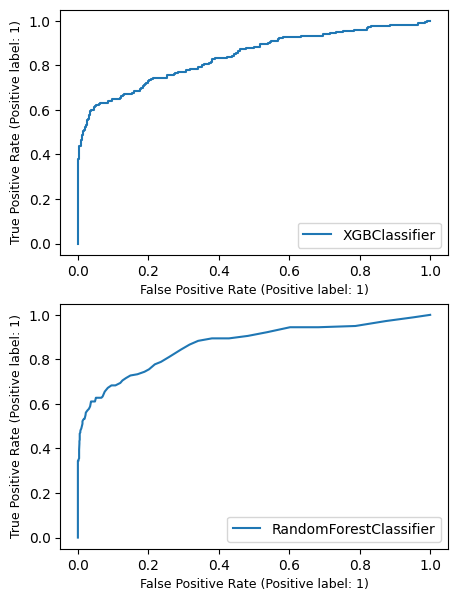

In [24]:
### BEGIN Solution (do not delete this comment)
xgb = XGBClassifier(random_state=0xC0FFEE)
rf = RandomForestClassifier(random_state=0xC0FFEE)

t_start = time.perf_counter() # count time for xgb
xgb.fit(X_train, y_train)
xgb_time = time.perf_counter() - t_start
print('Training time for xgb:', xgb_time)

t_start = time.perf_counter() # count time for random forest
rf.fit(X_train, y_train)
rf_time = time.perf_counter() - t_start
print('Training time for random forest:', rf_time)

xgb_precision = average_precision_score(y_test, xgb.predict(X_test)) # estimate precision
rf_precision = average_precision_score(y_test, rf.predict(X_test))
print('Average precision score for XGBoost:', xgb_precision)
print('Average precision score for Random Forest:', rf_precision)

plt.figure(figsize=(5, 7))

xgb_pred_proba = xgb.predict_proba(X_test)[::,1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_pred_proba)

rf_pred_proba = rf.predict_proba(X_test)[::,1]
fpr_rf, tpr_rf, _ = roc_curve(y_test,  rf_pred_proba)

ax = plt.subplot(2, 1, 1)
ax.plot(fpr_xgb,tpr_xgb,label="XGBClassifier")
ax.set_ylabel('True Positive Rate (Positive label: 1)', fontsize=9)
ax.set_xlabel('False Positive Rate (Positive label: 1)', fontsize=9)
ax.legend(loc=4)

ax = plt.subplot(2, 1, 2)
ax.plot(fpr_rf,tpr_rf,label="RandomForestClassifier")
ax.set_ylabel('True Positive Rate (Positive label: 1)', fontsize=9)
ax.set_xlabel('False Positive Rate (Positive label: 1)', fontsize=9)
ax.legend(loc=4)

plt.legend()
plt.show()
### END Solution (do not delete this comment)

* extract and compare the feature importances calculated by the previously trained XGBoost and Random Forest Classifiers. Are they different or the same, why?

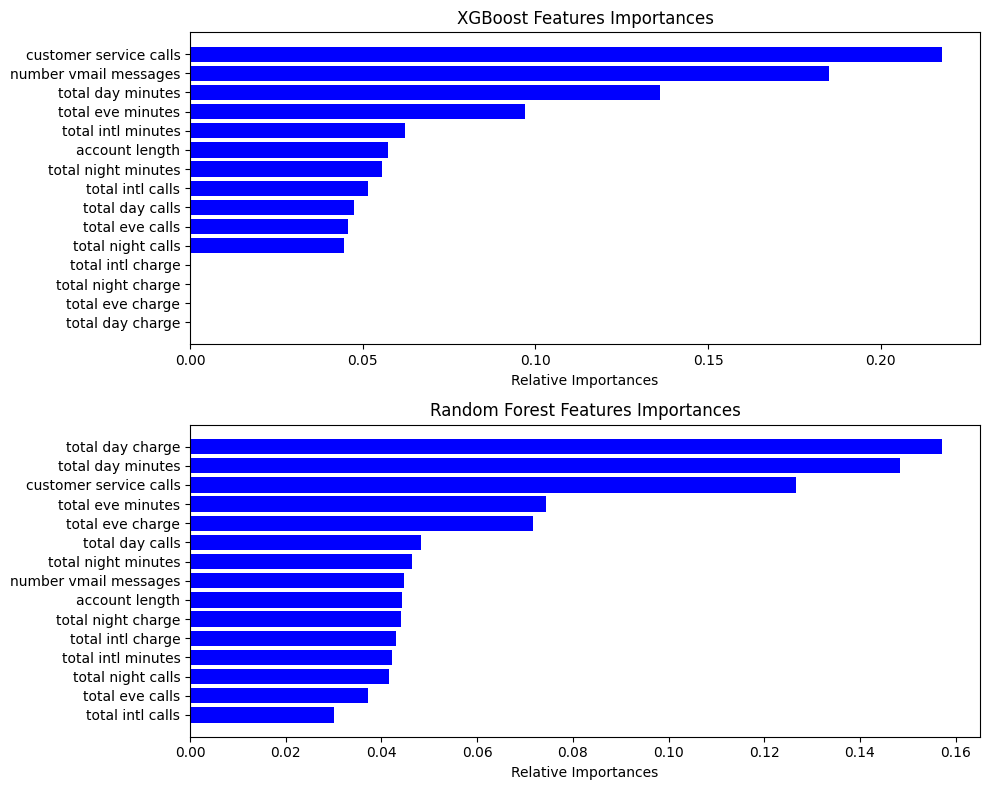

In [25]:
### BEGIN Solution (do not delete this comment)
plt.figure(figsize=(10, 8))

ax = plt.subplot(2, 1, 1)
ind = np.argsort(xgb.feature_importances_)
ax.barh(xgb.feature_names_in_[ind], xgb.feature_importances_[ind],color='blue')
ax.set_title('XGBoost Features Importances')
ax.set_xlabel('Relative Importances')

ax = plt.subplot(2, 1, 2)
ind = np.argsort(rf.feature_importances_)
ax.barh(rf.feature_names_in_[ind], rf.feature_importances_[ind], color='blue')
ax.set_title('Random Forest Features Importances')
ax.set_xlabel('Relative Importances')

plt.tight_layout()
plt.show()
### END Solution (do not delete this comment)

**Your text answer (do not delete this comment)**:

* As we can see on the plots, feature importances different for XGB and Random Forest models. This is because they work differently: Random Forest use random features to construct trees and uses bagging technique, so all trees work with different subset of data and use different features for splitting, thus with high probability all features will participate in splitting. But in XGBoost by default used all features for tree construction, so it can peak only important features, and if there some correlations in features, it can keep only uncorrelated group, in other words do not pick correalted features for constructing trees. As it works for default decision tree construction.

In [3]:
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings("ignore")

## Task 8. Model and feature selection problem (3 points)

Your goal in this task is to predict the price (```price_doc```) given some characteristics of a house. In order to do that, you will demonstrate your abilities in data preprocessing, finding feature importances, applying different ML models.

### Subproblem 8.1. Data preprocessing and feauture importances (1 point)

The goal of this subproblem is to prepare the data for further usage. Complete all of the following subtasks:

**8.1.1) load the dataset `./data/data_fs.csv`**

In [3]:
### BEGIN Solution (do not delete this comment)
data = pd.read_csv('./data/data_fs.csv')
### END Solution (do not delete this comment)

**8.1.2) preprocess the dataset by dropping the ```timestamp``` feature, filling ```NaN```s with 0, converting the categorical variables into dummy variables**

In [4]:
### BEGIN Solution (do not delete this comment)
data = data.drop(columns=['timestamp'])
data = data.fillna(0)
data = pd.get_dummies(data)
X, y = data.drop(columns=['price_doc']), data['price_doc']

n_features = len(X.columns)
print(n_features)
### END Solution (do not delete this comment)

560


**8.1.3) define ```x_train```, ```x_test```, ```y_train```, ```y_test```. The train-test split should be 70:30**


In [5]:
### BEGIN Solution (do not delete this comment)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                 random_state=0xC0FFEE)
### END Solution (do not delete this comment)


**8.1.4) plot the histogram of y values. Note that the mean of these values is very high and the distribution of the values is far from normal. Create ```y_train_log``` and ```y_test_log``` by applying $log_{y}$. Now plot the new histogram of the obtained values. You should use these log values for the next subtasks.**   

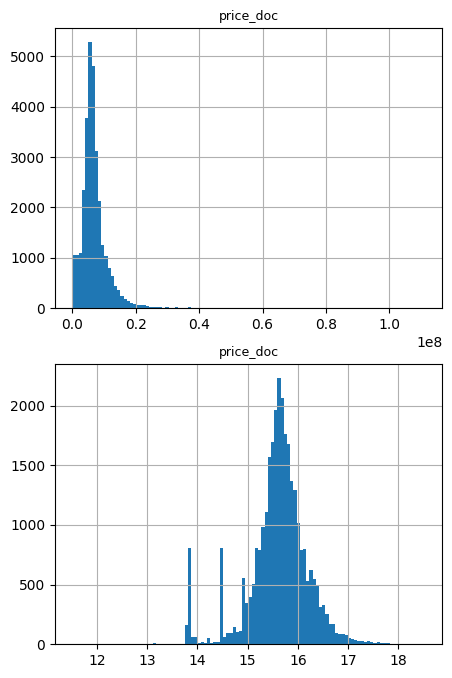

In [6]:
### BEGIN Solution (do not delete this comment)
plt.figure(figsize=(5,8))
ax = plt.subplot(2, 1, 1)
ax.hist(y, bins=110)
ax.grid()
ax.set_title('price_doc', fontsize=9)

ax = plt.subplot(2,1,2)
ax.hist(np.log(y), bins=110)
ax.grid()
ax.set_title('price_doc', fontsize=9)

plt.show()

y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)
### END Solution (do not delete this comment)

**8.1.5) print the number of features in the created ```x_train``` and ```x_test``` datasets. Answer the question: do you think all of these features are relevant for the adequate price prediction?**


In [7]:
### BEGIN Solution (do not delete this comment)
print('Train size =', X_train.shape)
print('Test size =', X_test.shape)
### END Solution (do not delete this comment)

Train size = (21329, 560)
Test size = (9142, 560)


**Your text answer (do not delete this comment)**:

Dataset contains a lot of features, it seems that not all of them needed for price predicting.

There are too many features in this dataset and not all of them are equally important for our problem. Besides, using the whole dataset as-is to train a linear model will, for sure, lead to overfitting. Instead of painful and time consuming manual selection of the most relevant data, we will use the methods of automatic feature selection.

**8.1.6) use random forest to find the importance of the features. Plot the histogram of the importances.**

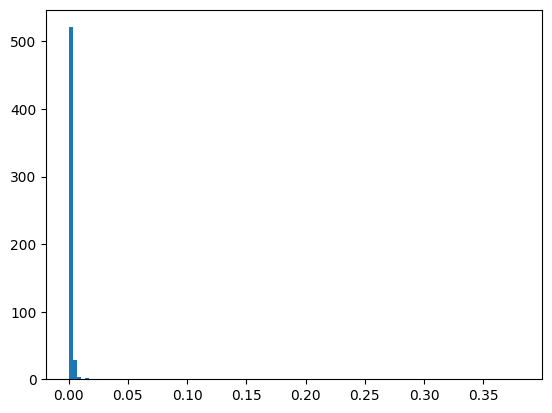

In [8]:
### BEGIN Solution (do not delete this comment)
rf = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=0xC0FFEE, n_jobs=-1)
rf.fit(X_train, y_train_log)

plt.hist(rf.feature_importances_, bins=110)
plt.show()
### END Solution (do not delete this comment)

**8.1.7) print the names of the 20 most important features**

In [9]:
### BEGIN Solution (do not delete this comment)
ind = np.argsort(rf.feature_importances_)
important_features = rf.feature_names_in_[ind[-20:]][::-1]
print(important_features)
### END Solution (do not delete this comment)

['full_sq' 'cafe_count_2000' 'num_room' 'sport_count_3000'
 'cafe_count_5000_price_2500' 'cafe_count_3000' 'metro_km_avto' 'ttk_km'
 'cafe_count_5000' 'exhibition_km' 'public_healthcare_km'
 'detention_facility_km' 'micex_cbi_tr' 'swim_pool_km'
 'rent_price_2room_bus' 'cafe_count_3000_price_1000' 'kindergarten_km'
 'big_road1_km' 'brent' 'big_church_km']


#### Subproblem 8.2. Training models on the most important features (1 point)

In this subproblem, you will train several ML models on the found 20 most important features: train **Linear Regression**,  **Ridge regression**, **Random forest**,  **DecisionTree** and evaluate their performance using the Root Mean Squared Logarithmic Error (RMSLE) on both train/test sets. 

You will have to repeat the same actions in the next tasks too, so we recommend to implement
a dedicated function for comparisons, which
1. it takes a training dataset `(X_train, y_train)` and a test sample `(X_test, y_test)` as the input;
2. it trains **all of the listed models** on the `(X_train, y_train)` sample;
3. it computes and returns a table with the RMSLE score of each fitted model on the train and test datasets.

**8.2.1) Implement the function described above**

In [10]:
### BEGIN Solution (do not delete this comment)
methods = ['Linear Regression', 'Ridge', 'Dtree', 'RFR']

def compare(X_train, y_train, X_test, y_test):
    linear_reg = LinearRegression(n_jobs=-1).fit(X_train, y_train)
    ridge = Ridge(random_state=0xC0FFEE).fit(X_train, y_train)
    dtree = DecisionTreeRegressor(random_state=0xC0FFEE).fit(X_train, y_train)
    rf = RandomForestRegressor(random_state=0xC0FFEE, n_jobs=-1).fit(X_train, y_train)
    
    train_error = []
    test_error = []
    for regressor in [linear_reg, ridge, dtree, rf]:
        pred_train = regressor.predict(X_train)
        train_error.append(mse(y_train, pred_train, squared=False))
        pred_test = regressor.predict(X_test)
        test_error.append(mse(y_test, pred_test, squared=False))
        
    data = {'Methods': methods, 'Train error': train_error, 'Test error': test_error}
    table = pd.DataFrame(data=data)
    
    return table
### END Solution (do not delete this comment)

**8.2.2) Apply the implemented function to our dataset (use only the 20 most important features)**

In [15]:
### BEGIN Solution
compare(X_train[important_features], y_train_log, X_test[important_features], y_test_log)
### END Solution

,Methods,Train error,Test error
0,Linear Regression,0.529224,0.538302
1,Ridge,0.529224,0.538302
2,Dtree,0.004353,0.673847
3,RFR,0.175567,0.486485


<br>

### Subproblem 8.3. Forward-backward methods (1 point)
In the subproblems above, we have relied on the feature importances found by the random forest method. The main goal of this subproblem is to find them by appling the forward-backward methods: the main idea is to add or remove features and compute how this removal influences the value of the loss function or some other criteria.

Decision about adding or deleting a feature may be made based on:

- AIC
- BIC
- validation error
- Mallows $C_p$
- sklearn's `estimator.score()`

In subtasks 8.3.1 - 8.3.3, implement the following greedy feature selection algorithm with early stopping using the mean of the RMSLE scores achieved on the 3-fold cross-validation. Please bear in mind that **the lower** RMSLE (`mean_squared_log_error`) is, **the higher the model "quality" is** and look up `cross_val_score(...)` peculiarities in [scikit's manual](https://scikit-learn.org/stable/documentation.html) for more information.

```python
# Initialize with an empty list of features.
list_of_best_features = []

while round < n_rounds:
    round = round + 1
    
    if no_more_features:
        # end loop

    # Iterate over currently *unused* features and use $k$-fold 
    # . `cross_val_score` to measure model "quality".
    compute_quality_with_each_new_unused_feature(...)

    # **Add** the feature that gives the highest "quality" of the model.
    pick_and_add_the_best_feature(...)

    if model_quality_has_increased_since_last_round:
        round = 0

return list_of_best_features
```

**8.3.1) In the cell below, you have to implement a function that would iterate over a list of features and use $k$-fold `cross_val_score` to measure model's "quality".** 

In [11]:
from sklearn.metrics import make_scorer

def selection_step(model, X, y, used_features=(), cv=3):
    """
    Parameters
    ==========
        X: ndarray - training inputs
        y: ndarray - training targets
        used_features: - list of features
        cv: int - number of folds

    Returns
    =======
        scores - dictionary of scores
    """
    
    scores = {}
    
    ### BEGIN Solution
    unused_features = set(X.columns) - set(used_features)
    scorer = make_scorer(mse, squared=False)
    for feature in unused_features:
        score = cross_val_score(model, X[used_features + [feature]], y, scoring=scorer, cv=cv, n_jobs=-1)
        scores[feature] = np.mean(score)
    ### END Solution

    return scores

**8.3.2) Implement a forward greedy feature selection function (the one described in the pseudocode in the subtask 1 above) that would**

**- compute the model's "quality" over currently *unused* features**

**- find the feature, which has given the best score and add to the list of the currently *used* features**

**- if the model's quality has increased since the last round, add this feauture to the list of the best features and  print the best score and the current best features list**

**Do not forget to implement the early stopping.**

In [12]:
def forward_steps(X, y, n_rounds, model):
    """
    Parameters
    ==========
        X: ndarray - training inputs
        y: ndarray - training targets
        n_rounds: int - early stop when score doesn't increase n_rounds
        model: sklearn model

    Returns
    =======
        feat_best_list - list of features
    """
    
    feat_best_list = []

    ### BEGIN Solution
    cur_best_score = np.inf
    round_ = 0
    
    while round_ != n_rounds:
        round_ += 1
        if len(feat_best_list) == X.shape[1]:
            break
            
        scores = selection_step(model, X, y, feat_best_list)
        
        best_feat = min(scores, key=scores.get)
        feat_best_list.append(best_feat)
        
        if scores[best_feat] < cur_best_score:
            cur_best_score = scores[best_feat]
            print('Added feature:', best_feat, ', current score:', cur_best_score)
            round_ = 0
        
    print("Best score:", cur_best_score)
    print("Best features:", feat_best_list)
    ### END Solution
    
    return feat_best_list


**8.3.3) Use the function implemented above + DecisionTreeRegressor to get the best features according to this algorithm. (HINT: Use ```n_rounds = 2```)**

In [13]:
### BEGIN Solution
n_rounds = 2
model = DecisionTreeRegressor(random_state=0xC0FFEE)
forward_alg_features = forward_steps(X_train, y_train_log, n_rounds, model)
### END Solution

Added feature: full_sq , current score: 0.5227546846994966
Added feature: ecology_no data , current score: 0.5005417322702231
Added feature: sub_area_Nekrasovka , current score: 0.4965917958957386
Added feature: sub_area_Poselenie Vnukovskoe , current score: 0.49491404544862644
Added feature: old_education_build_share_0 , current score: 0.49335025613103295
Added feature: sub_area_Hamovniki , current score: 0.4925019093105585
Added feature: sub_area_Poselenie Novofedorovskoe , current score: 0.4916800009334263
Added feature: sub_area_Ivanovskoe , current score: 0.49102055166056197
Added feature: sub_area_Poselenie Filimonkovskoe , current score: 0.49050441780633486
Added feature: sub_area_Vojkovskoe , current score: 0.49001912811317694
Added feature: sub_area_Zapadnoe Degunino , current score: 0.489483856808745
Added feature: sub_area_Solncevo , current score: 0.4892679738638995
Added feature: sub_area_Poselenie Moskovskij , current score: 0.48906684057288813
Added feature: sub_area_Nag

**8.3.4) Use Linear Regression, Ridge regression, Random forest and DecisionTree to get the RMSLE score using these features. Remember the function you wrote earlier.**

In [14]:
### BEGIN Solution
print('EXPECTED OUTPUT FORMAT')
compare(X_train[forward_alg_features], y_train_log, X_test[forward_alg_features], y_test_log)
### END Solution

EXPECTED OUTPUT FORMAT


,Methods,Train error,Test error
0,Linear Regression,0.546875,0.550090
1,Ridge,0.546890,0.550126
2,Dtree,0.455452,0.511807
3,RFR,0.457317,0.505930


<br>

## Task 9. Multi-Class Classification Strategies (1 point)
In this task, you will deal with the multiclass classification problem for the Glass Classification Data. Let's load the dataset.

In [7]:
data = pd.read_csv('data/glass.csv')
X, y = data.drop('Type', axis=1), data.Type
data.sample(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
30,1.51768,12.65,3.56,1.30,73.08,0.61,8.69,0.0,0.14,1
192,1.51623,14.20,0.00,2.79,73.46,0.04,9.04,0.4,0.09,7
123,1.51707,13.48,3.48,1.71,72.52,0.62,7.99,0.0,0.00,2


The features of each glass oject correspond to the fraction of the particular chemical element in the object. The target variable corresponds to the type of glass (6 classes).

In this problem, you have to empirically compare the time complexity and performance of several multiclass labeling strategies for different algorithms. You must consider the following algorithms:
* Single Decision Tree (depth 7)
* Medium Random Forest (100 trees of depth 3)
* KNearestNeighbors (5 neighbors)
* Logistic Regression

Note that all these algorithms by default support **multiclass labeling**. Nevertheless, we want you to compare this approach with **OneVSRest** and **OneVSOne** approaches applied to this algorithms. More precisely, for every pair (algorithm, approach) you are to perform 5-fold cross validation on the data and output the validation score and the computation time in the **table** form. Please note that you also have to choose the metric to optimize during CV (e.g. accuracy, balanced accuracy) on your own. 

After that, you are to answer the following questions:
* Which metric did you choose to optimize during cross validation and why? Explain
* For which algorithms the usage of OneVSRest/OneVSOne approach provides significantly better performance without significant increase in computation time?

In [10]:
### BEGIN Solution (do not delete this comment)
dtree = DecisionTreeClassifier(max_depth=7, random_state=0xC0FFEE)
rf = RandomForestClassifier(n_estimators=100, max_depth=3, n_jobs=1, random_state=0xC0FFEE)
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=1)
logreg = LogisticRegression(max_iter=2000, random_state=0xC0FFEE, n_jobs=1)

methods = ['Multiclass', 'OneVsRest', 'OneVsOne']

scores = [] # scores for every model and approach. First 3 will be for one model, second 3 for another and so on
times = [] # same for cross_validation time 

y_matrix = (y[:,None] == np.unique(y)).astype(int)
scorer = make_scorer(f1_score, average='weighted')

for model in [dtree, rf, knn, logreg]:
    start = time.perf_counter()
    val_score = cross_val_score(model, X, y, scoring=scorer, cv=5, n_jobs=-1).mean() #cross_val for basic model
    end = time.perf_counter()
    scores.append(val_score)
    times.append(end - start)
    for approach in [OneVsRestClassifier, OneVsOneClassifier]: # iterate over methods
        clf = approach(model, n_jobs=-1)
        start = time.perf_counter()
        val_score = cross_val_score(clf, X, y, scoring=scorer, cv=5, n_jobs=-1).mean()
        end = time.perf_counter()
        scores.append(val_score)
        times.append(end - start)
    
dtree_scores = scores[:3]
rf_scores = scores[3:6]
knn_scores = scores[6:9]
logreg_scores = scores[9:]

dtree_times = times[:3]
rf_times = times[3:6]
knn_times = times[6:9]
logreg_times = times[9:]

print('Cross Validation Scores')
table_scores = pd.DataFrame({'Logistic': logreg_scores, 'Random Forest': rf_scores, 
                             'K Nearest Neighbours': knn_scores, 'Decision Tree': dtree_scores}, index=methods)
display(table_scores)

print('Training Duration (CV=5)')
table_times = pd.DataFrame({'Logistic': logreg_times, 'Random Forest': rf_times, 
                             'K Nearest Neighbours': knn_times, 'Decision Tree': dtree_times}, index=methods)
display(table_times)
### END Solution (do not delete this comment)

Cross Validation Scores


,Logistic,Random Forest,K Nearest Neighbours,Decision Tree
Multiclass,0.523946,0.546834,0.577174,0.558621
OneVsRest,0.516044,0.559080,0.595097,0.545808
OneVsOne,0.508046,0.584677,0.591219,0.621377


Training Duration (CV=5)


,Logistic,Random Forest,K Nearest Neighbours,Decision Tree
Multiclass,0.764117,0.552844,0.026794,0.024072
OneVsRest,0.917781,5.589903,0.095502,0.104200
OneVsOne,2.173964,12.078103,0.374155,0.134837


**Which metric did you choose to optimize during cross validation and why? Explain**

**Your text answer (do not delete this comment)**:

I chosed f1_metric, because it takes in account both of precision and recall metrics, so it is showes us, if any of this metrics are suffers.

**For which algorithms the usage of OneVSRest/OneVSOne approach provides significantly better performance without significant increase in computation time?**

**Your text answer (do not delete this comment)**:

As we can see from the table, Decision Tree improved score with OneVsOne approach by 0.06, which is good result, without huge increase in time work. Also, KNN improved score too, by 0.02, which not so big as with DTree case, but nevertheless.

Logistic Regression couldn't improved score, and Random Forest worked too slow with OneVsOne and OneVsRest approaches.

# Task 10. Stacking (2 points)

Stacking is an ensembling approach, which combines several algorithms (base models) to get better results. This is achieved by **a)** training the base models (any ML models) on the initial train data (or parts of the train data, see the paragraph below), **b)** training the meta-model (also an ML model) on the predictions of those base models.

One of the main problems of stacking is overfitting. To avoid it, when evaluating the performance of the meta-model on the train set, the training data is divided into $ n $ folds, $ (n-1) $ of which are used for training the base models. The $ n $ -th fold is used for the overall prediction (calculating the meta-factor) in the following manner: the predictions on the $ n $ -th fold are made by the base models (already trained on the rest of the dataset), then these predictions are fed as inputs to the meta-model.

When evaluating the performance of the meta-model on the test set, there can be used various approaches$.^{[1]}$ For example, in order, to obtain meta-factors for the test data, the base classifiers can be trained on the entire training set, since the problem of overfitting does not arise here. In other words, if we want to calculate the factors for the test set, we can safely use the training set to train the base classifiers (once again, as it is said in the paragraph above, if we want to calculate factors for the training set, then it is necessary to ensure that the classifier does not predict for those objects on which it has been trained).  

You can read more details about stacking [blockpost](https://blog.statsbot.co/ensemble-learning-d1dcd548e936), [kaggle ensemble guide](https://mlwave.com/kaggle-ensembling-guide/).

P.S. Stacking and Blending are two similar approaches to combining classifiers (ensembling). The difference is that Stacking uses out-of-fold predictions for the train set, and Blending uses a validation set to train the next layer ([source](quora.com/What-are-examples-of-blending-and-stacking-in-Machine-Learning)). Because they are so similar you can use any of them. 

[1] http://www.machinelearning.ru/wiki/images/5/56/Guschin2015Stacking.pdf  

**Your task will be:**

* Complete the ```meta_classfier``` function
* Choose 6 different base models (base models can be any models that you know, and can differ between each other by different hyperparameters, models of ml, features e.t.c) and train them.
* Report individual accuracy on test set for each of the models.
* Train the metaclassifier on the original datasets features, report score on test.
* Train the metaclassifier on the base models using $n$-fold cross-validation, as described above. Retrain the base models on the whole training set. Report the test score (accuracy) of the meta-classifier in this case.
* Does stacking help to gain better score?

For this task we will use the dataset fetch_covertype from [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_covtype.html#sklearn.datasets.fetch_covtype). Split it train-test - 60/40.
More detail about this dataset you can find [here](https://archive.ics.uci.edu/ml/datasets/Covertype)

In [16]:
from sklearn import datasets
fc = datasets.fetch_covtype()

Write meta classifier function.

In [35]:
from sklearn.model_selection import cross_val_predict

def meta_classifier(base_clfs, final_classifier, X_train, X_test, y_train, cv):
    """
    Meta classifier prediction using stacking. 
    Input:
    :param base_clfs: list,  base classifiers which will be stacked together.
    :param final_classifier: estimator, a classifier which will be used to combine the base estimators. 
    :param X_train: numpy array or pandas table, train set.
    :param X_test: numpy array or pandas table, target for train set.
    :param X_train: numpy array or pandas table, test set.
    :param cv: number of cross-validation folds.
    
    Output:
    :param y_pred: numpy array or pandas table, prediction of meta classifier using stacking on test set.
    :param final_classifier(optional): estimator, trained final_calssifier.
    
    
    More details https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html
    
    """
    ### BEGIN Solution (do not delete this comment)
    meta_train = np.array([]) #training data for metaclassifier
    for clf in base_clfs:
        pred = cross_val_predict(clf, X_train, y_train, cv=cv, n_jobs=-1)
        if len(meta_train) == 0:
            meta_train = pred
        else:
            meta_train = np.c_[meta_train, pred]
    
    final_classifier.fit(meta_train, y_train)
    
    meta_test = np.array([]) #test data for metaclassifier
    for clf in base_clfs:
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        if len(meta_test) == 0:
            meta_test = pred
        else:
            meta_test = np.c_[meta_test, pred]
    
    pred = final_classifier.predict(meta_test)
    
    return pred, final_classifier
        
    ### END Solution (do not delete this comment)
    pass

### Subproblem 10.1 (1 point)

**10.1.1) Chose 6 different base models (base models can be any models that you know,and can differ with each other by different hyperparameters,  models of ml, features e.t.c) and train them.**

In [36]:
### BEGIN Solution (do not delete this comment)
X, y = fc['data'], fc['target'] - 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=0xC0FFEE)

classifiers = [ExtraTreesClassifier(n_estimators=100, max_depth=1, random_state=0xC0FFEE, n_jobs=-1),
               RandomForestClassifier(n_estimators=100, max_depth=1, random_state=0xC0FFEE, n_jobs=-1),
               DecisionTreeClassifier(max_depth=2),
               DecisionTreeClassifier(max_depth=3),
               AdaBoostClassifier(random_state=0xC0FFEE),
               RandomForestClassifier(n_estimators=50, max_depth=2, random_state=0xC0FFEE, n_jobs=-1)] 

for clf in classifiers:
    clf.fit(X_train, y_train)
### END Solution (do not delete this comment)

**10.1.2) Report individual scores on test set. As a score use accuracy.**

In [37]:
### BEGIN Solution (do not delete this comment)
print('accuracy of ExtraTreesClassifier max_depth=1 on test:  ', accuracy_score(y_test, classifiers[0].predict(X_test)))
print('accuracy of RandomForestClassifier max_depth=1 on test:', accuracy_score(y_test, classifiers[1].predict(X_test)))
print('accuracy of DecisionTreeClassifier max_depth=2 on test:', accuracy_score(y_test, classifiers[2].predict(X_test)))
print('accuracy of DecisionTreeClassifier max_depth=3 on test:', accuracy_score(y_test, classifiers[3].predict(X_test)))
print('accuracy of AdaBoostClassifier on test:                ', accuracy_score(y_test, classifiers[4].predict(X_test)))
print('accuracy of RandomForestClassifier max_depth=2 on test:', accuracy_score(y_test, classifiers[5].predict(X_test)))
### END Solution (do not delete this comment)

accuracy of ExtraTreesClassifier max_depth=1 on test:   0.4856048708074267
accuracy of RandomForestClassifier max_depth=1 on test: 0.5205395753103419
accuracy of DecisionTreeClassifier max_depth=2 on test: 0.6690776876573223
accuracy of DecisionTreeClassifier max_depth=3 on test: 0.6764699554656741
accuracy of AdaBoostClassifier on test:                 0.38884275295281945
accuracy of RandomForestClassifier max_depth=2 on test: 0.6347539854994514


### Subproblem 10.2 (1 point)

**10.2.1) Train metaclassifier on original datasets features. And report score on test.**

In [38]:
### BEGIN Solution (do not delete this comment)
metaclassifier = LogisticRegression(random_state=0xC0FFEE)
metaclassifier.fit(X_train, y_train)
print('accuracy of metaclassifier on original datasets features on test:', 
      accuracy_score(y_test, metaclassifier.predict(X_test)))
### END Solution (do not delete this comment)

accuracy of metaclassifier on original datasets features on test: 0.622559755599062


**10.2.2) Train the metaclassifier on the base models using $n$-fold cross-validation, as described above. Retrain the base models on the whole training set. Report the test score (accuracy) of the meta-classifier in this case.**

In [39]:
### BEGIN Solution (do not delete this comment)
y_pred, metaclassifier = meta_classifier(classifiers, metaclassifier, X_train, X_test, y_train, 5)
print('accuracy of metaclassifier with stacking on test:', 
      accuracy_score(y_test, y_pred))
### END Solution (do not delete this comment)

accuracy of metaclassifier with stacking on test: 0.6698177750048407


**10.2.3) Does stacking helped to gain better score?**

**Your text answer (do not delete this comment)**:

As we can see, score increased by 0.04, so yes, stacking helps to gain better score for metaclassifier. But we can see, that one of base classifiers performed better than final metaclassifier. Maybe it is because of different nature of train and test data.